In [1]:
import pandas as pd
data= pd.read_csv("5000rpm.csv")
data

,Time,Front Bearing D,Front Bearing C,Inner Housing Front,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA,HousingB,Support,Room Temperature,Deformation,Speed
0,1,31.12,31.15,30.96,31.05,30.99,31.29,31.09,30.75,31.14,29.1,30.99,0.16520,5000
1,4,31.15,31.37,31.23,31.08,30.85,31.08,30.95,30.77,31.48,29.2,30.65,0.60545,5000
2,7,31.32,31.20,31.37,31.13,31.04,31.23,31.27,31.04,31.32,29.2,30.76,0.38600,5000
3,10,31.14,31.06,30.79,31.21,30.95,31.21,31.22,31.20,31.42,29.1,30.65,0.46840,5000
4,13,31.23,31.35,31.11,31.12,30.91,31.58,31.19,31.17,30.96,29.1,30.73,0.24505,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,23570,36.21,36.59,36.78,37.28,37.63,38.22,38.24,36.01,34.99,29.9,31.60,12.54565,5000
7895,23573,36.28,36.63,36.80,37.34,37.64,38.33,38.38,36.10,34.79,29.9,31.57,12.56500,5000
7896,23576,36.22,36.52,36.70,37.36,37.71,38.34,38.23,36.12,34.89,29.7,31.63,12.64350,5000
7897,23579,36.21,36.62,36.82,37.21,37.83,38.27,38.29,36.08,34.70,29.8,31.64,12.66060,5000


In [2]:
#將時間還有變形量移除
data2= pd.read_csv("5000rpm.csv",usecols=[4,5,6,7,8])
data2

,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA
0,31.05,30.99,31.29,31.09,30.75
1,31.08,30.85,31.08,30.95,30.77
2,31.13,31.04,31.23,31.27,31.04
3,31.21,30.95,31.21,31.22,31.20
4,31.12,30.91,31.58,31.19,31.17
...,...,...,...,...,...
7894,37.28,37.63,38.22,38.24,36.01
7895,37.34,37.64,38.33,38.38,36.10
7896,37.36,37.71,38.34,38.23,36.12
7897,37.21,37.83,38.27,38.29,36.08


In [3]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# to make this notebook's output identical at every run
np.random.seed(42)

In [4]:
x=data2
y=data.Deformation

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA
7779,37.58,37.50,38.43,38.25,36.11
7741,37.33,37.50,38.24,38.31,36.05
196,31.84,31.98,32.87,32.52,31.90
4483,37.22,37.54,38.46,38.13,35.95
3539,37.16,37.47,38.11,38.01,35.91
...,...,...,...,...,...
5226,37.02,37.46,38.40,38.32,35.94
5390,37.36,37.46,38.11,38.26,36.05
860,34.36,34.68,35.50,35.57,33.83
7603,37.18,37.49,38.37,38.21,35.89


In [21]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=300,criterion='mse', max_depth=10, min_samples_split=2, min_samples_leaf=5, max_features=5, random_state=42)
predict=model.fit(x_train,y_train).predict(x_test)
predict

array([12.56820842,  9.69166422, 12.28598222, ..., 12.41049518,
       12.42032537, 12.09969331])

In [22]:
errors = abs(predict - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.11 degrees.


In [23]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test,predict))

print(rmse)

0.14716261799635857


<function matplotlib.pyplot.show(*args, **kw)>

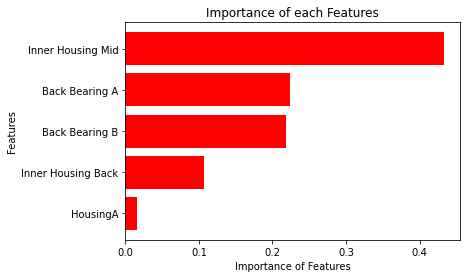

In [24]:
imp=model.feature_importances_
imp
import matplotlib.pyplot as plt
%matplotlib inline
names=data2.columns
zip(imp,names)
imp,names=zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center',color="red")
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of each Features')
plt.show

In [25]:
print("Traing Score:%f"%model.score(x_train,y_train))
print("Testing Score:%f"%model.score(x_test,y_test))

Traing Score:0.993404
Testing Score:0.991355


In [26]:
import pandas as pd
data3= pd.read_csv("5001rpm.csv")
data4= pd.read_csv("5001rpm.csv",usecols=[4,5,6,7,8])
x2=data4
y2=data3.Deformation

In [63]:
from sklearn.ensemble import RandomForestRegressor
predict_df=[]
model=RandomForestRegressor(n_estimators=450,criterion='mse', max_depth=7, min_samples_split=2, min_samples_leaf=5, max_features=5, random_state=42)
model.fit(x_train,y_train)
for m in range(0, len(x2)):
    X_new = [x2.iloc[m,:]]
    predict_df.append(model.predict(X_new))

In [64]:
import pandas as pd

#產出CSV檔                
def Output5000():   
    Result ='C://Users/User/Desktop/5003re.csv'
    df_SAMPLE = pd.DataFrame.from_dict( predict_df )
    df_SAMPLE.to_csv( Result  , index=False )
    print( '成功產出'+Result )

In [65]:
Output5000()

成功產出C://Users/User/Desktop/5003re.csv
